# PRCP - 1001 Rice_leaf_disease_prediction

In [1]:
#importing the required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from glob import glob

In [2]:
# checking of no. of images present in the dataset
dataset_path = 'Dataset/' 
classes = ['Bacterial_leaf_blight','Brown_spot','Leaf_smut']

for class_name in classes:
    print(f"Class {class_name} contains {len(glob(os.path.join(dataset_path, class_name, '*.jpg')))} images.")

Class Bacterial_leaf_blight contains 40 images.
Class Brown_spot contains 40 images.
Class Leaf_smut contains 39 images.


#### Analysis : From the dataset shared, there are 40 images of each classes

In [3]:
len(classes)

3

#### Analysis : There are three diffferent classes in the dataset, there are 1. bacterial leaf blight, 2. brown spot and 3. leaf smut

## EDA - Exploratory data analysis

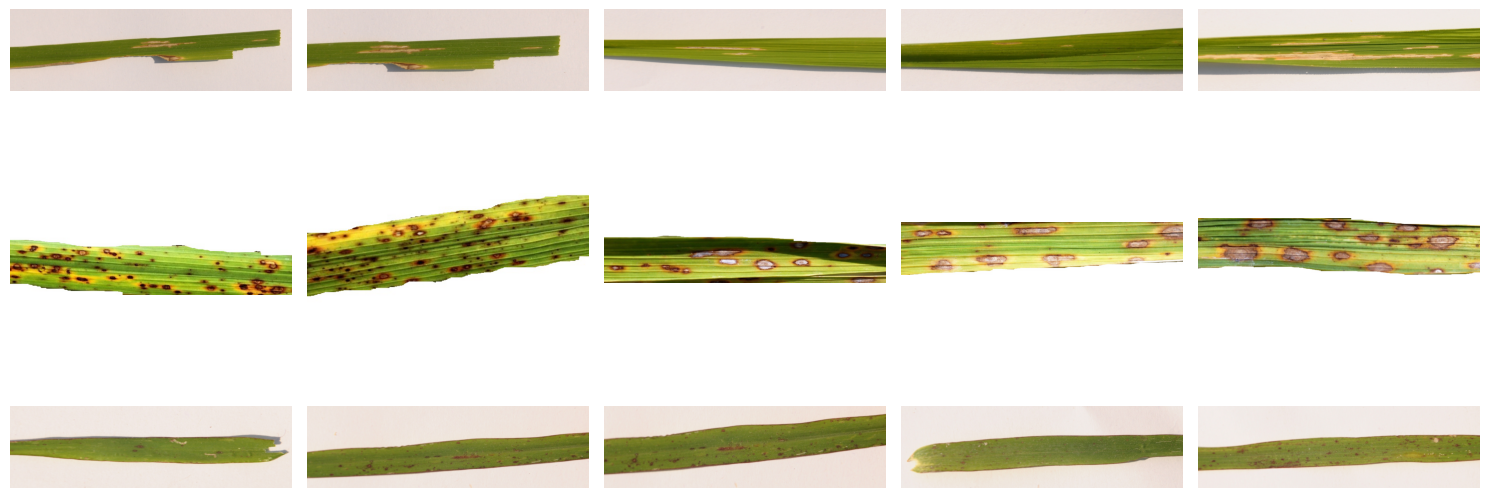

In [4]:
def display_sample_images(dataset_path, classes, num_samples=5):
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 7))
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(dataset_path, class_name)
        class_images = glob(os.path.join(class_folder, '*.jpg'))[:num_samples]
        for j, img_path in enumerate(class_images):
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
        axes[i, 0].set_ylabel(class_name, fontsize=16)
    plt.tight_layout()
    plt.show()

display_sample_images(dataset_path, classes)


#### Analysis : From the above diagram, sample of 5 images are taken from the classes and shown, the 1st row represent sample images on Bacterial_brown_blight, the 2nd row represent sample images of Brown_spot, and the 3d row represent sample images of leaf_smut

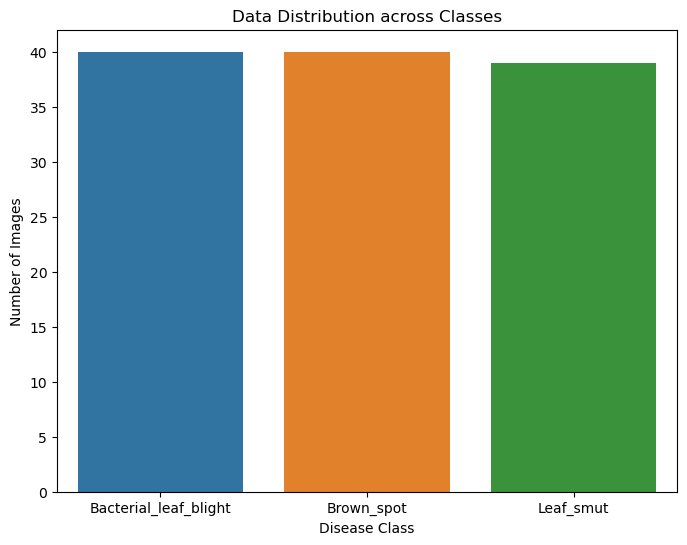

In [5]:
data_distribution = {class_name: len(glob(os.path.join(dataset_path, class_name, '*.jpg'))) for class_name in classes}

# Plotting distribution
plt.figure(figsize=(8,6))
sns.barplot(x=list(data_distribution.keys()), y=list(data_distribution.values()))
plt.title("Data Distribution across Classes")
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.show()

#### Analysis : Graphical representation of no. of images in each classes, in leaf_smut 39 images are present in other category 40 images of each are present

             Width      Height
count   119.000000  119.000000
mean   2383.638655  707.739496
std    1123.528972  311.657582
min     250.000000   71.000000
25%    1074.000000  377.000000
50%    3081.000000  897.000000
75%    3081.000000  897.000000
max    3081.000000  900.000000


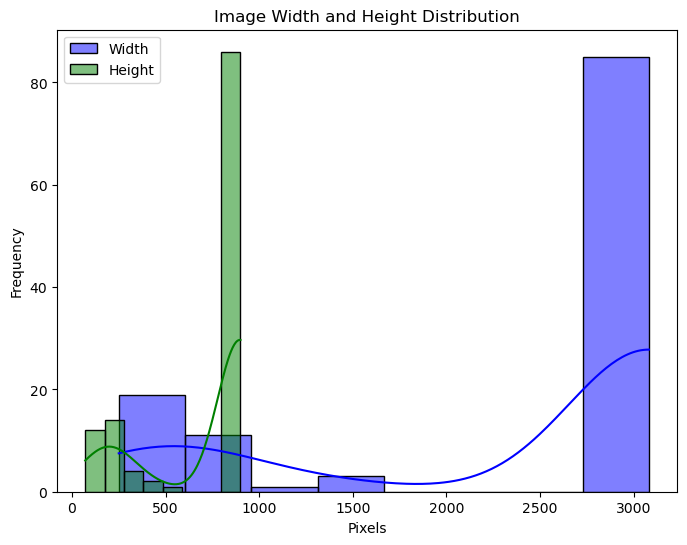

In [6]:
def get_image_statistics(dataset_path, classes):
    image_shapes = []
    for class_name in classes:
        class_images = glob(os.path.join(dataset_path, class_name, '*.jpg'))
        for img_path in class_images:
            img = Image.open(img_path)
            image_shapes.append(img.size)
    return image_shapes

# Get the image sizes
image_shapes = get_image_statistics(dataset_path, classes)

# Convert to a DataFrame for easier analysis
image_shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])

# Display basic statistics
print(image_shapes_df.describe())

# Plotting the distribution of image sizes
plt.figure(figsize=(8, 6))
sns.histplot(image_shapes_df['Width'], color='blue', kde=True, label='Width')
sns.histplot(image_shapes_df['Height'], color='green', kde=True, label='Height')
plt.title("Image Width and Height Distribution")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Analysis : code which effectively retrieves image dimensions from a dataset, and visualizes the distribution of image widths and heights. From this plot, variability in image sizes, which might be important for preprocessing the images. In one of the image, width of the image of 3000pixels, and height of 1000 pixels

Pixel intensity for Bacterial_leaf_blight image:


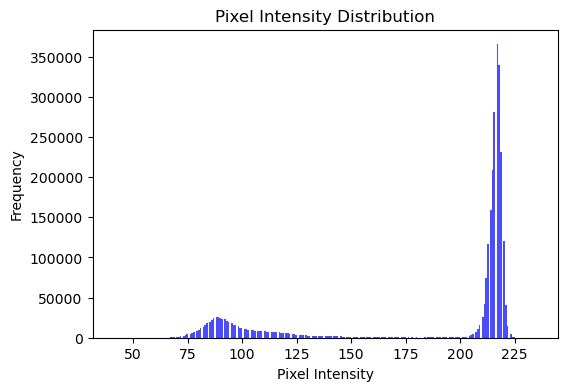

Pixel intensity for Brown_spot image:


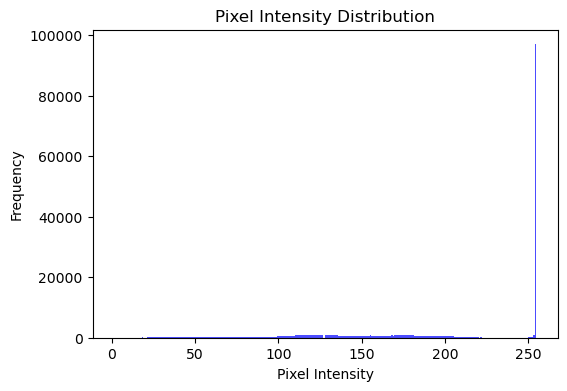

Pixel intensity for Leaf_smut image:


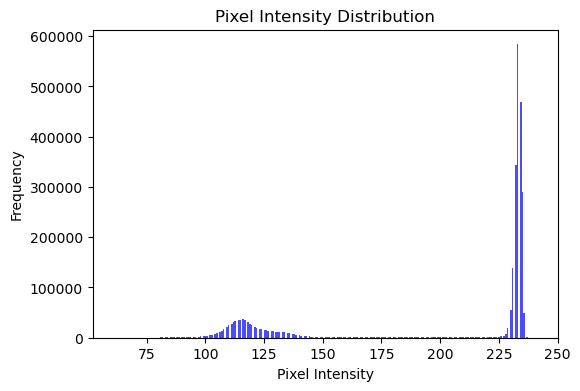

In [7]:
def plot_pixel_intensity(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(6, 4))
    plt.hist(img.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Display pixel intensity for one sample image from each class
for class_name in classes:
    sample_image = glob(os.path.join(dataset_path, class_name, '*.jpg'))[0]
    print(f"Pixel intensity for {class_name} image:")
    plot_pixel_intensity(sample_image)

#### Analysis: By plotting the pixel intensity plots, the brightness and contrast of images within each class can be visualized. This information helps various image processing tasks, such as normalization, thresholding, and other preprocessing steps before training a model.From the above sample graphs on each class, one can conclude that almost all of the images are colored images where the pixes intensity is 225. 

## Pre-processing

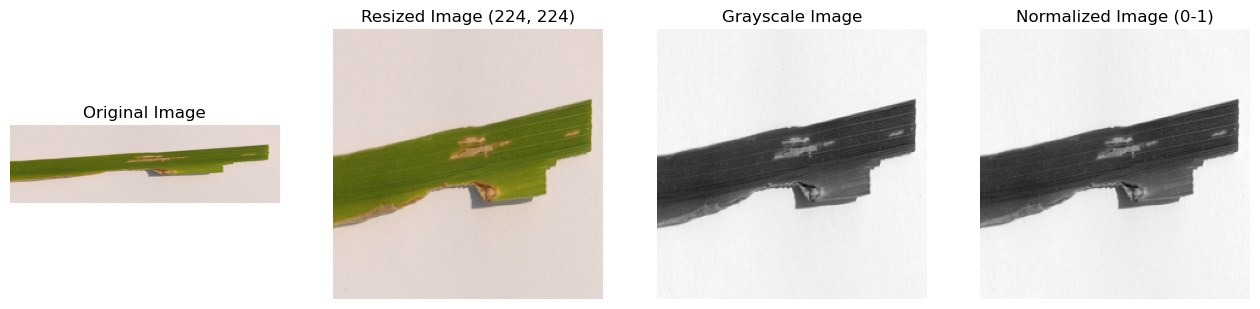

In [8]:
target_size = (224, 224)  # Resize to 224x224

def process_image(image_path, target_size):
    # open the original image
    img = Image.open(image_path)
    
    # Resize the image
    img_resized = img.resize(target_size)
    
    # Convert into grayscale
    img_gray = img_resized.convert('L')
    
    # Normalize the grayscale image
    img_normalized = np.array(img_gray) / 255.0
    
    return img, img_resized, img_gray, img_normalized

# sample preprocessing
image_path = glob.glob(os.path.join(dataset_path, classes[0], '*.jpg'))[0]
original_img, resized_img, gray_img, normalized_img = process_image(image_path, target_size)

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Original Image
axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Resized Image
axs[1].imshow(resized_img)
axs[1].set_title(f'Resized Image {target_size}')
axs[1].axis('off')

# Grayscale Image
axs[2].imshow(gray_img, cmap='gray')
axs[2].set_title('Grayscale Image')
axs[2].axis('off')

# Normalized Image
axs[3].imshow(normalized_img, cmap='gray')
axs[3].set_title('Normalized Image (0-1)')
axs[3].axis('off')

plt.show()


#### Analysis: Using PIL library image has to be read, resize the image into (target_size = 224,224), convert the RGb image into grayscale using convert('L'), finally normalize the image i.e to numerical format ranges between 0 -1 which is useful for building the model.

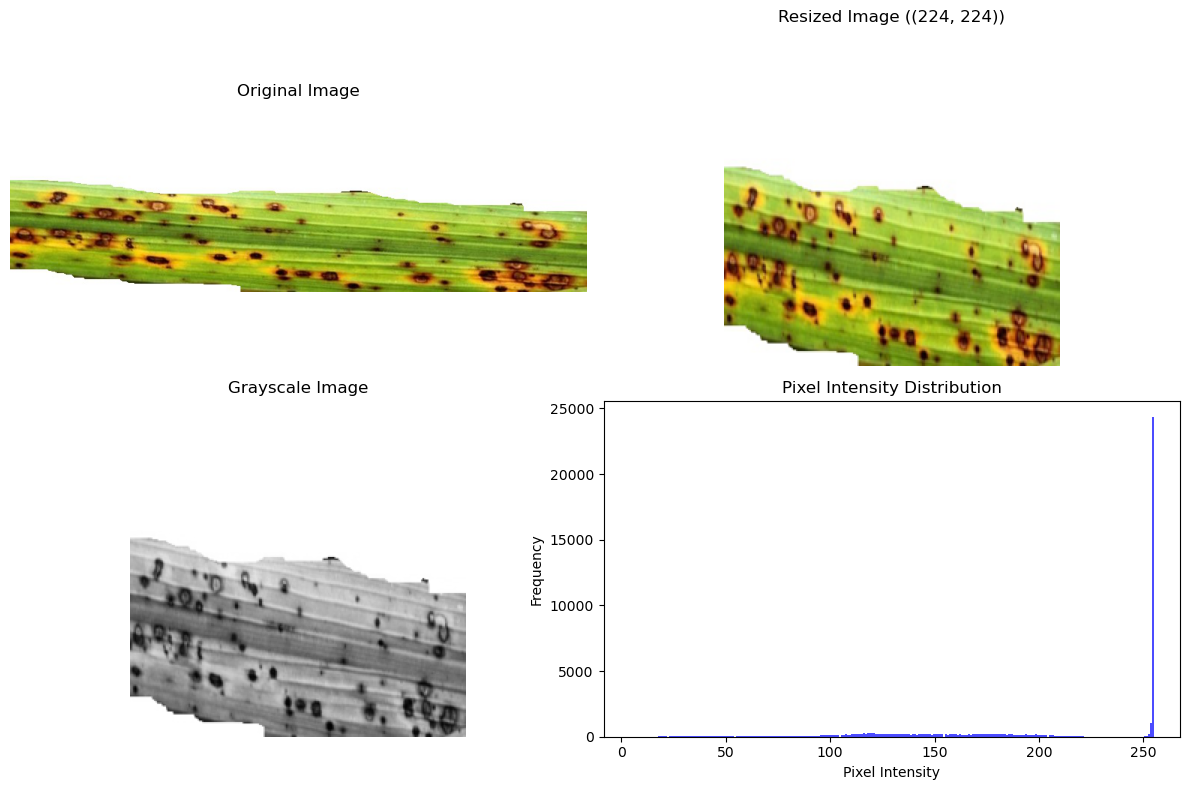

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from glob import glob

# Choose one image from each class
sample_image_path = glob(os.path.join(dataset_path, classes[1], '*.jpg'))[0]  # Change index for other classes

# Load the image
original_img = Image.open(sample_image_path)

# Resize the image
target_size = (224, 224)
resized_img = original_img.resize(target_size)

# Convert image to grayscale and compute pixel intensity distribution
# grayscale_img = cv2.imread(sample_image_path, cv2.IMREAD_GRAYSCALE)
grayscale_img = resized_img .convert('L')

# Function to plot multiple characteristics in one figure
def plot_image_analysis(original_img, resized_img, grayscale_img):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Plot original image
    axes[0, 0].imshow(original_img)
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')

    # Plot resized image
    axes[0, 1].imshow(resized_img)
    axes[0, 1].set_title(f"Resized Image ({target_size})")
    axes[0, 1].axis('off')

    # Plot grayscale image
    axes[1, 0].imshow(grayscale_img, cmap='gray')
    axes[1, 0].set_title("Grayscale Image")
    axes[1, 0].axis('off')

    # Plot pixel intensity distribution
    axes[1, 1].hist(np.array(grayscale_img).ravel(), bins=256, color='blue', alpha=0.7)
    axes[1, 1].set_title("Pixel Intensity Distribution")
    axes[1, 1].set_xlabel("Pixel Intensity")
    axes[1, 1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Call the function to visualize
plot_image_analysis(original_img, resized_img, grayscale_img)


#### Analysis: From the above, using matplotlib library sample images are plot and their individual pixel intensity graphs are plotted, with this the particular image have 250 pixels.

## Model building - CNN

In [11]:
# importing required libraries like tensorflow, keras for building the deep learning cnn model
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image

In [12]:
# Setting image size and other parameters
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 3

In [13]:
# file location of images 
data_dir = 'Dataset/'

In [14]:
# Preprocess function: convert to grayscale, resize, normalize
def preprocess_image(image):
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]
    return image_array

# Load images and labels
def load_images_from_folder(data_dir):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_dir)):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            for file_name in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file_name)
                image = Image.open(file_path)
                image_array = preprocess_image(image)
                images.append(image_array)
                labels.append(class_label)
    return np.array(images), np.array(labels)

# Load dataset
images, labels = load_images_from_folder(data_dir)

# Reshape images to include the channel dimension (since it's grayscale)
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Analysis : 
#### 1. From the same preprocessing steps, all the images from three different classes are converted into (224,224), grayscale and normalize using function preprocess_image
#### 2. Using train_test_split 40% of data are used for testing and validation and the remaing 60% data are used for training the model

In [15]:
images # preprocessed images into array

array([[[[0.85490196],
         [0.85098039],
         [0.85098039],
         ...,
         [0.85490196],
         [0.85882353],
         [0.85882353]],

        [[0.85098039],
         [0.85490196],
         [0.85098039],
         ...,
         [0.85490196],
         [0.85882353],
         [0.85882353]],

        [[0.85490196],
         [0.85490196],
         [0.85490196],
         ...,
         [0.85098039],
         [0.85882353],
         [0.85882353]],

        ...,

        [[0.85882353],
         [0.85490196],
         [0.85882353],
         ...,
         [0.85882353],
         [0.85490196],
         [0.85098039]],

        [[0.85490196],
         [0.85098039],
         [0.85882353],
         ...,
         [0.85882353],
         [0.85490196],
         [0.85098039]],

        [[0.85490196],
         [0.85490196],
         [0.85882353],
         ...,
         [0.85490196],
         [0.85490196],
         [0.85490196]]],


       [[[0.85098039],
         [0.85098039],
         [0.85

In [16]:
labels # respected target labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
print(X_train.shape,X_temp.shape)
print(y_train.shape,y_temp.shape)
print(X_val.shape,X_test.shape)
print(y_val.shape,y_test.shape)

(71, 224, 224, 1) (48, 224, 224, 1)
(71,) (48,)
(24, 224, 224, 1) (24, 224, 224, 1)
(24,) (24,)


#### Analysis: 71 images are used for training, 24 images for testing and 24 images for validation, where all images are convert into normalized with grayscale images.

In [18]:
# Building of convolutional neural network
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Analysis: 3 layers of deep learning architecture with conv2d followed by max_pooling layers are build, then all the neurons are flatten for classification, using dropout layers 50% of features wil get dropped out.

In [20]:
# Train the model without data augmentation
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 3.6453 - accuracy: 0.2958 - val_loss: 2.3242 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 3s 926ms/step - loss: 1.8918 - accuracy: 0.3239 - val_loss: 1.1237 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 3s 951ms/step - loss: 1.0952 - accuracy: 0.3803 - val_loss: 1.1500 - val_accuracy: 0.2917
Epoch 4/20
3/3 [==============================] - 3s 926ms/step - loss: 1.1546 - accuracy: 0.3099 - val_loss: 1.0912 - val_accuracy: 0.2917
Epoch 5/20
3/3 [==============================] - 3s 952ms/step - loss: 1.1272 - accuracy: 0.3380 - val_loss: 1.1147 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 3s 943ms/step - loss: 1.1211 - accuracy: 0.3944 - val_loss: 1.1573 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 3s 952ms/step - loss: 1.1326 - accuracy: 0.3662 - val_loss: 1.1297 - val_accuracy: 0.3333
Epoch 8/20
3/3 [=======

In [21]:
model.save("model1_cnn.keras") # save the model weights in .keras format for future 

In [22]:
# load the model using keras.model libraries
from tensorflow.keras.models import load_model
model = load_model('model1_cnn.keras')

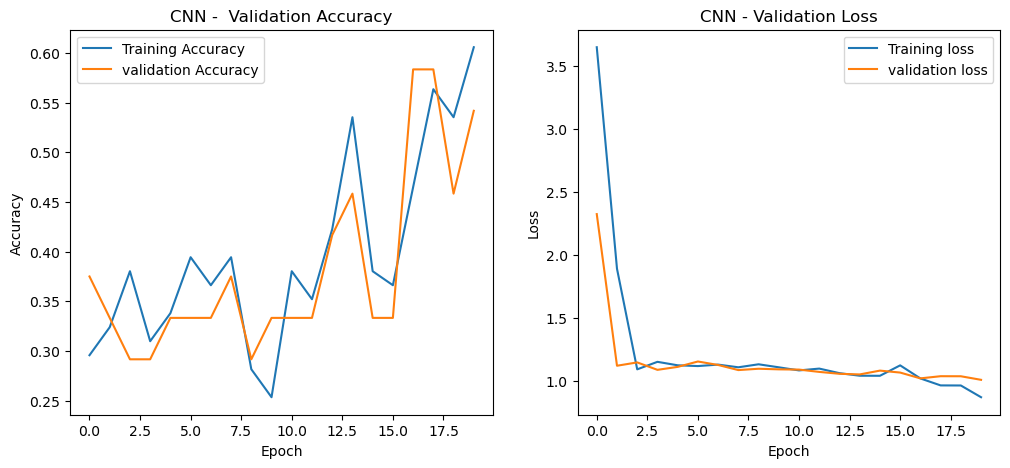

In [23]:
# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
# plt.plot(accuracy, label='Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN -  Validation Accuracy')
plt.legend(['Training Accuracy','validation Accuracy'])

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN - Validation Loss')
plt.legend(['Training loss','validation loss'])
plt.show()

In [24]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

1/1 [==============================] - 0s 408ms/step - loss: 1.0128 - accuracy: 0.4167
Test Accuracy: 0.4167


#### Analysis: By plotting the validation accuracy and validation loss, and finding out model accuracy by evaluation, CNN model without augmentation perform only 42%

In [25]:
# Predict classes for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

1/1 [==============================] - 0s 276ms/step


array([0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2], dtype=int64)

In [26]:
y_test # real data 

array([1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 1])

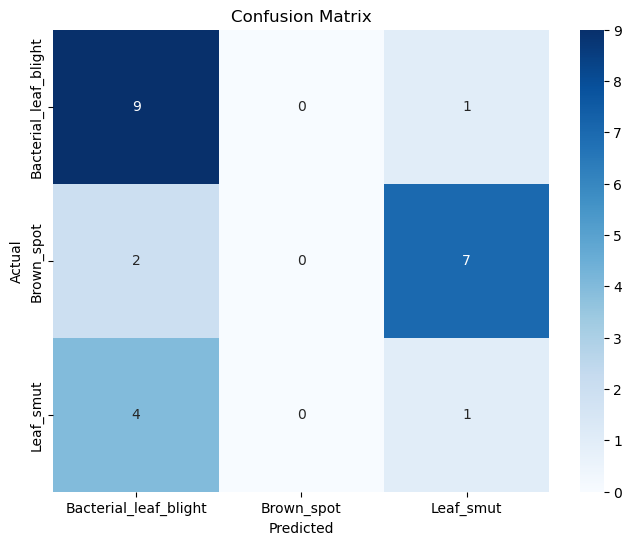

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], yticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Analysis: CNN model predict only 2 classes, where build CNN model doesnot performs well on Brown spot leaf

In [28]:
# Classification Report
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report

class_report = classification_report(y_test, y_pred, target_names=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
print('Classification Report:\n', class_report)

cnn_accuracy = accuracy_score(y_test,y_pred)
print("CNN_accuracy: %f" % cnn_accuracy)

cnn_precision = precision_score(y_test,y_pred,average='macro')
print("CNN_precision: %f" % cnn_precision)

cnn_recall = recall_score(y_test,y_pred,average='macro')
print("CNN_recall: %f" % cnn_recall)

cnn_f1_score = f1_score(y_test,y_pred,average='macro')
print("CNN_f1_score: %f" % cnn_f1_score)

Classification Report:
                        precision    recall  f1-score   support

Bacterial_leaf_blight       0.60      0.90      0.72        10
           Brown_spot       0.00      0.00      0.00         9
            Leaf_smut       0.11      0.20      0.14         5

             accuracy                           0.42        24
            macro avg       0.24      0.37      0.29        24
         weighted avg       0.27      0.42      0.33        24

CNN_accuracy: 0.416667
CNN_precision: 0.237037
CNN_recall: 0.366667
CNN_f1_score: 0.287619


C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

#### Analysis : From the above code, performance metrics are calcuated which shows very less precision, where f1-score also less indicate model performs biased

## Model Building - ANN

In [29]:
# file location where the images are stored
data_dir = 'Dataset/'

In [30]:
# Preprocessing
def preprocess_image(image):
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]
    return image_array

# Load images and labels
def load_images_from_folder(data_dir):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_dir)):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            for file_name in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file_name)
                image = Image.open(file_path)
                image_array = preprocess_image(image)
                images.append(image_array)
                labels.append(class_label)
    return np.array(images), np.array(labels)

In [31]:
images, labels = load_images_from_folder(data_dir)
print(images)
print(labels)
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(images)

[[[0.85490196 0.85098039 0.85098039 ... 0.85490196 0.85882353 0.85882353]
  [0.85098039 0.85490196 0.85098039 ... 0.85490196 0.85882353 0.85882353]
  [0.85490196 0.85490196 0.85490196 ... 0.85098039 0.85882353 0.85882353]
  ...
  [0.85882353 0.85490196 0.85882353 ... 0.85882353 0.85490196 0.85098039]
  [0.85490196 0.85098039 0.85882353 ... 0.85882353 0.85490196 0.85098039]
  [0.85490196 0.85490196 0.85882353 ... 0.85490196 0.85490196 0.85490196]]

 [[0.85098039 0.85098039 0.85882353 ... 0.85490196 0.85098039 0.85490196]
  [0.84705882 0.85098039 0.85490196 ... 0.85098039 0.85098039 0.85490196]
  [0.85098039 0.85490196 0.85490196 ... 0.85490196 0.85490196 0.85882353]
  ...
  [0.85882353 0.85490196 0.85882353 ... 0.8627451  0.8627451  0.85882353]
  [0.85882353 0.85490196 0.85882353 ... 0.8627451  0.8627451  0.8627451 ]
  [0.8627451  0.85490196 0.8627451  ... 0.86666667 0.8627451  0.8627451 ]]

 [[0.8745098  0.8745098  0.87843137 ... 0.87058824 0.87058824 0.8745098 ]
  [0.87058824 0.874509

In [32]:
# Splitting the dataset for training, validation, and testing 
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
print(X_train.shape,X_temp.shape)
print(y_train.shape,y_temp.shape)
print(X_val.shape,X_test.shape)
print(y_val.shape,y_test.shape)

(71, 224, 224, 1) (48, 224, 224, 1)
(71,) (48,)
(24, 224, 224, 1) (24, 224, 224, 1)
(24,) (24,)


In [34]:
# Flatten the images for ANN input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [35]:
#input shape of flatten images
print(X_train_flat.shape)
print(X_val_flat.shape)
print(X_test_flat.shape)

(71, 50176)
(24, 50176)
(24, 50176)


In [36]:
# Building a simple neural netork model
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE * IMG_SIZE,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               25690624  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 25855235 (98.63 MB)
Trainable params: 25

## Analysis : 
#### 1. fully connected (dense) layer has 512 neurons and uses the ReLU activation function. It allows the model to learn complex patterns.
#### 2. dropout layer randomly drops 50% of the neurons during training to help prevent overfitting.
#### 3. dense layer with 256 neurons and ReLU activation learns more complex representations.
#### 4. final dense layer contains NUM_CLASSES neurons, where each neuron represents a class in the classification task.

In [37]:
# model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# model training
history = model.fit(X_train_flat, y_train, batch_size=BATCH_SIZE, validation_data=(X_val_flat, y_val), epochs=20)

Epoch 1/20
3/3 [==============================] - 2s 405ms/step - loss: 16.3029 - accuracy: 0.2817 - val_loss: 44.0123 - val_accuracy: 0.2917
Epoch 2/20
3/3 [==============================] - 1s 333ms/step - loss: 44.4559 - accuracy: 0.3239 - val_loss: 15.4964 - val_accuracy: 0.2917
Epoch 3/20
3/3 [==============================] - 1s 336ms/step - loss: 38.8764 - accuracy: 0.4225 - val_loss: 12.3365 - val_accuracy: 0.2917
Epoch 4/20
3/3 [==============================] - 1s 344ms/step - loss: 42.6571 - accuracy: 0.3380 - val_loss: 28.0775 - val_accuracy: 0.2917
Epoch 5/20
3/3 [==============================] - 1s 335ms/step - loss: 57.3990 - accuracy: 0.2817 - val_loss: 20.1016 - val_accuracy: 0.2917
Epoch 6/20
3/3 [==============================] - 1s 337ms/step - loss: 34.5491 - accuracy: 0.3803 - val_loss: 11.8501 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 1s 335ms/step - loss: 30.1155 - accuracy: 0.3521 - val_loss: 14.6477 - val_accuracy: 0.3333
Epoch 

In [39]:
model.save("model_ANN.keras")

In [40]:
from tensorflow.keras.models import load_model
model = load_model('model_ANN.keras')

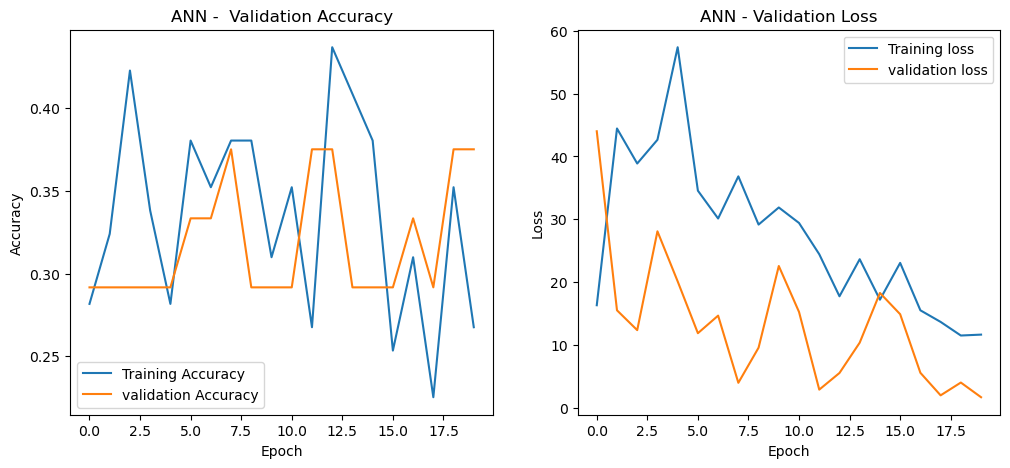

In [41]:
# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
# plt.plot(accuracy, label='Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ANN -  Validation Accuracy')
plt.legend(['Training Accuracy','validation Accuracy'])

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN - Validation Loss')
plt.legend(['Training loss','validation loss'])
plt.show()

In [42]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

1/1 [==============================] - 0s 392ms/step - loss: 1.6210 - accuracy: 0.3750
Test Accuracy: 0.3750


In [43]:
# Predict classes for the test set
y_pred = np.argmax(model.predict(X_test_flat), axis=1)
y_pred

1/1 [==============================] - 0s 62ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [44]:
y_test

array([1, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0,
       0, 1])

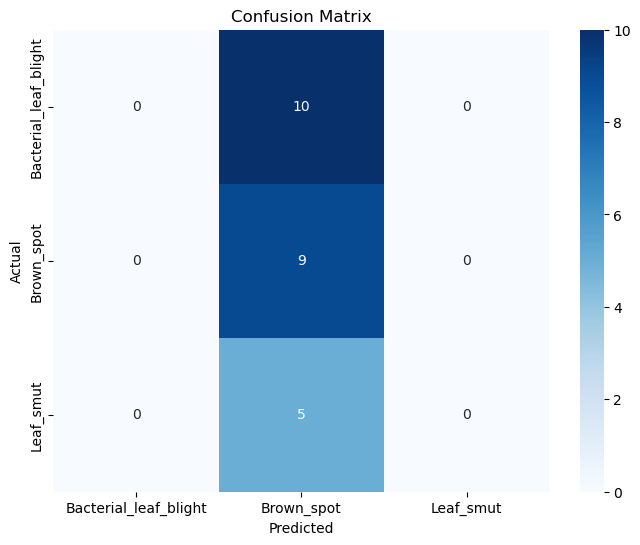

In [45]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], yticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Analysis: From the above model building, our dataset doesnot perform well on simple neural network , evethough by trying various dense layer structure, model perform biased.

In [46]:
# Classification Report
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report
class_report = classification_report(y_test, y_pred, target_names=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
print('Classification Report:\n', class_report)

ann_accuracy = accuracy_score(y_test,y_pred)
print("ANN_accuracy: %f" % ann_accuracy)

ann_precision = precision_score(y_test,y_pred,average='macro')
print("ANN_precision: %f" % ann_precision)

ann_recall = recall_score(y_test,y_pred,average='macro')
print("ANN_recall: %f" % ann_recall)

ann_f1_score = f1_score(y_test,y_pred,average='macro')
print("ANN_f1_score: %f" % ann_f1_score)

Classification Report:
                        precision    recall  f1-score   support

Bacterial_leaf_blight       0.00      0.00      0.00        10
           Brown_spot       0.38      1.00      0.55         9
            Leaf_smut       0.00      0.00      0.00         5

             accuracy                           0.38        24
            macro avg       0.12      0.33      0.18        24
         weighted avg       0.14      0.38      0.20        24

ANN_accuracy: 0.375000
ANN_precision: 0.125000
ANN_recall: 0.333333
ANN_f1_score: 0.181818


C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

#### Analysis : From the classifiation report,model doesnot predict bacterial_leaf_blight and leaf_smut. so the precision and f1_score are very low when compared to accuracy and recall

## Model Building with Data Augmentation - ANN

## Data Augmentation - A technique used to artificially expand the size of a training dataset by creating modified versions of existing data. It helps to improve the ability of  models by making them more robust to variations in input data. The common technique used in data augmentations are rotation, shifting,shearing, zooming, filling etc..,

In [47]:
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 3

data_dir = 'Dataset_aug'
classes = ['Bacterial_leaf_blight','Brown_spot','Leaf_smut']

for class_name in classes:
    print(f"Class {class_name} contains {len(glob(os.path.join(data_dir, class_name, '*.jpg')))} images.")

Class Bacterial_leaf_blight contains 50 images.
Class Brown_spot contains 80 images.
Class Leaf_smut contains 75 images.


#### Analysis: After augmentation from 120 images to 200 images are developed using augmentation i.e. 80 images are generated

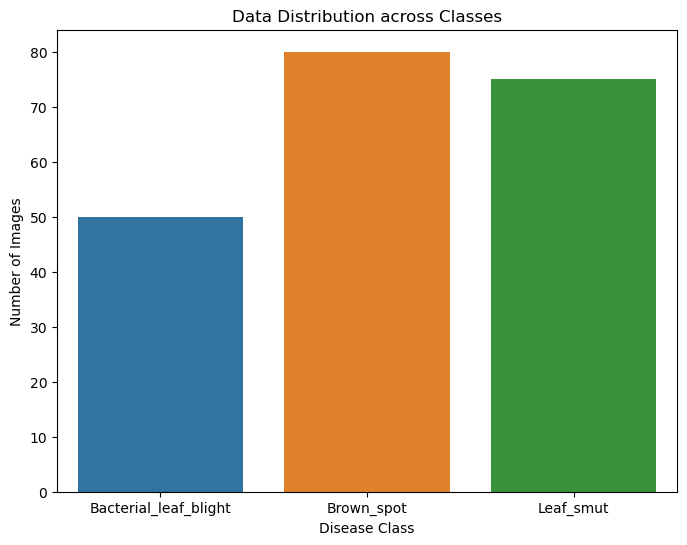

In [48]:
data_distribution = {class_name: len(glob(os.path.join(data_dir, class_name, '*.jpg'))) for class_name in classes}

# Plotting distribution
plt.figure(figsize=(8,6))
sns.barplot(x=list(data_distribution.keys()), y=list(data_distribution.values()))
plt.title("Data Distribution across Classes")
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.show()

#### Analysis : Brown_spot class have large number of images for classification when compared to other two classes

In [49]:
# Preprocessing the images
def preprocess_image(image):
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]
    return image_array

# Load images and labels
def load_images_from_folder(data_dir):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_dir)):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            for file_name in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file_name)
                image = Image.open(file_path)
                image_array = preprocess_image(image)
                images.append(image_array)
                labels.append(class_label)
    return np.array(images), np.array(labels)

In [50]:
# Load dataset
images, labels = load_images_from_folder(data_dir)
print(images)
print(labels)
# Reshape images for ANN model
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(images)

[[[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.94901961 0.94509804 0.94509804 ... 0.51372549 0.52156863 0.52156863]
  [0.94509804 0.94117647 0.94509804 ... 0.52156863 0.52156863 0.51372549]
  [0.94509804 0.94509804 0.94509804 ... 0.52156863 0.51372549 0.51764706]
  ...
  [0.56470588 0.57647059 0.58039216 ... 0.96078431 0.95294118 0.95294118]
  [0.57254902 0.58039216 0.59215686 ... 0.96078431 0.95686275 0.95294118]
  [0.58039216 0.58823529 0.6        ... 0.96078431 0.95686275 0.95294118]]

 [[1.         1.         1.         ... 0.2745098  0.27058824 0.25882353]
  [1.         1.      

In [51]:
# Splitting the dataset 
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [52]:
print(X_train.shape,X_temp.shape)
print(y_train.shape,y_temp.shape)
print(X_val.shape,X_test.shape)
print(y_val.shape,y_test.shape)

(123, 224, 224, 1) (82, 224, 224, 1)
(123,) (82,)
(41, 224, 224, 1) (41, 224, 224, 1)
(41,) (41,)


#### Analysis: There are 123 images are used for training purpose, 41 images for testing purpose

In [53]:
# Flattening the images for ANN input
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [54]:
print(X_train_flat.shape)
print(X_val_flat.shape)
print(X_test_flat.shape)

(123, 50176)
(41, 50176)
(41, 50176)


In [55]:
# Build a simple ANN model
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE * IMG_SIZE,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               25690624  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 25855235 (98.63 MB)
Trainable params: 25

## Analysis : 
#### 1. fully connected (dense) layer has 512 neurons and uses the ReLU activation function. It allows the model to learn complex patterns.
#### 2. dropout layer randomly drops 50% of the neurons during training to help prevent overfitting.
#### 3. dense layer with 256 neurons and ReLU activation learns more complex representations.
#### 4. final dense layer contains NUM_CLASSES neurons, where each neuron represents a class in the classification task.

In [56]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
# Train the model
history = model.fit(X_train_flat, y_train, batch_size=BATCH_SIZE, validation_data=(X_val_flat, y_val), epochs=20)

Epoch 1/20
4/4 [==============================] - 2s 368ms/step - loss: 25.7670 - accuracy: 0.3740 - val_loss: 12.9932 - val_accuracy: 0.4146
Epoch 2/20
4/4 [==============================] - 1s 314ms/step - loss: 36.8253 - accuracy: 0.3171 - val_loss: 16.7022 - val_accuracy: 0.3659
Epoch 3/20
4/4 [==============================] - 1s 304ms/step - loss: 35.2954 - accuracy: 0.3577 - val_loss: 9.1850 - val_accuracy: 0.4146
Epoch 4/20
4/4 [==============================] - 1s 304ms/step - loss: 36.1531 - accuracy: 0.2927 - val_loss: 12.4887 - val_accuracy: 0.3659
Epoch 5/20
4/4 [==============================] - 1s 305ms/step - loss: 23.4683 - accuracy: 0.3415 - val_loss: 4.4236 - val_accuracy: 0.2195
Epoch 6/20
4/4 [==============================] - 1s 304ms/step - loss: 19.7516 - accuracy: 0.3902 - val_loss: 9.0824 - val_accuracy: 0.4146
Epoch 7/20
4/4 [==============================] - 1s 306ms/step - loss: 24.6489 - accuracy: 0.2764 - val_loss: 4.1004 - val_accuracy: 0.3659
Epoch 8/20

In [58]:
model.save("model_ANN_aug.keras")

In [59]:
# load the model
from tensorflow.keras.models import load_model
model = load_model('model_ANN_aug.keras')

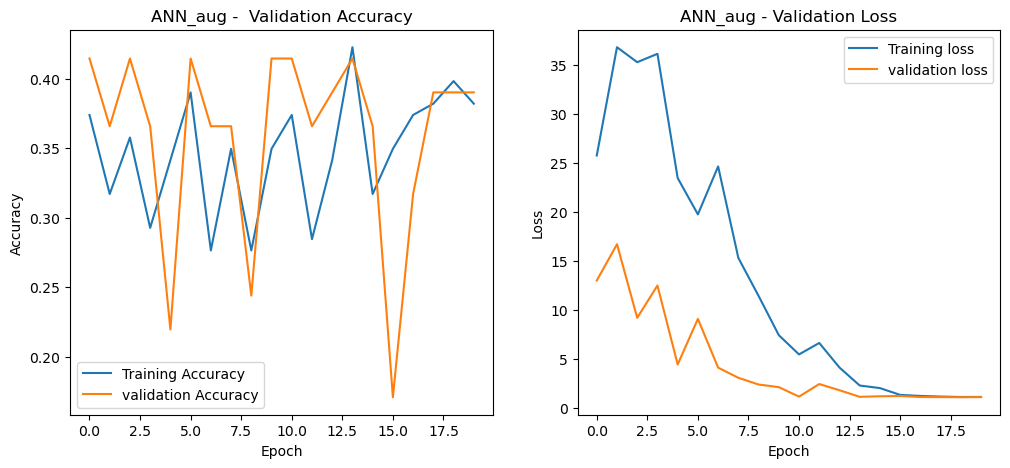

In [60]:
# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
# plt.plot(accuracy, label='Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ANN_aug -  Validation Accuracy')
plt.legend(['Training Accuracy','validation Accuracy'])

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ANN_aug - Validation Loss')
plt.legend(['Training loss','validation loss'])
plt.show()

In [61]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

2/2 [==============================] - 0s 18ms/step - loss: 1.0882 - accuracy: 0.4634
Test Accuracy: 0.4634


In [62]:
# Predict classes for the test set
y_pred = np.argmax(model.predict(X_test_flat), axis=1)
y_pred

2/2 [==============================] - 0s 15ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [63]:
y_test

array([1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1])

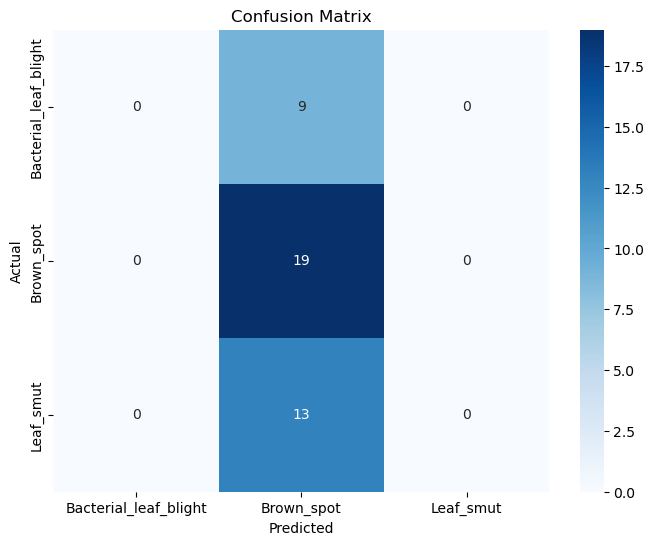

In [64]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], yticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Analysis : Eventhough after augmentation, ANN model doesnot perfom well, model performs biased

In [65]:
# Classification Report
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report
class_report = classification_report(y_test, y_pred, target_names=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
print('Classification Report:\n', class_report)

ann_aug_accuracy = accuracy_score(y_test,y_pred)
print("ANN_aug_accuracy: %f" % ann_aug_accuracy)

ann_aug_precision = precision_score(y_test,y_pred,average='macro')
print("ANN__aug_precision: %f" % ann_aug_precision)

ann_aug_recall = recall_score(y_test,y_pred,average='macro')
print("ANN_aug_recall: %f" % ann_aug_recall)

ann_aug_f1_score = f1_score(y_test,y_pred,average='macro')
print("ANN_aug_f1_score: %f" % ann_aug_f1_score)

Classification Report:
                        precision    recall  f1-score   support

Bacterial_leaf_blight       0.00      0.00      0.00         9
           Brown_spot       0.46      1.00      0.63        19
            Leaf_smut       0.00      0.00      0.00        13

             accuracy                           0.46        41
            macro avg       0.15      0.33      0.21        41
         weighted avg       0.21      0.46      0.29        41

ANN_aug_accuracy: 0.463415
ANN__aug_precision: 0.154472
ANN_aug_recall: 0.333333
ANN_aug_f1_score: 0.211111


C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user_login\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

#### Analysis : From the classifiation report,model doesnot predict bacterial_leaf_blight and leaf_smut. so the precision and f1_score are very low when compared to accuracy and recall

## Model building - CNN aug

#### Sample steps will be implemented for CNN architecture to find the accuracy

In [66]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image

In [67]:
# Set image size and other parameters
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 3

In [68]:
# Preprocess function: convert to grayscale, resize, normalize
def preprocess_image(image):
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]
    return image_array

# Load images and labels
def load_images_from_folder(data_dir):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_dir)):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            for file_name in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file_name)
                image = Image.open(file_path)
                image_array = preprocess_image(image)
                images.append(image_array)
                labels.append(class_label)
    return np.array(images), np.array(labels)

# Load dataset
images, labels = load_images_from_folder(data_dir)

# Reshape images to include the channel dimension (since it's grayscale)
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [69]:
images

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[0.94901961],
         [0.94509804],
         [0.94

In [70]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [71]:
print(X_train.shape,X_temp.shape)
print(y_train.shape,y_temp.shape)
print(X_val.shape,X_test.shape)
print(y_val.shape,y_test.shape)

(123, 224, 224, 1) (82, 224, 224, 1)
(123,) (82,)
(41, 224, 224, 1) (41, 224, 224, 1)
(41,) (41,)


#### Analysis: flattening is not done, because CNN architecture takes images into 2D format

In [72]:
# Build a simple neural network model
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 128)      

In [73]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# Train the model without data augmentation
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
4/4 [==============================] - 5s 1s/step - loss: 2.2549 - accuracy: 0.3577 - val_loss: 1.2193 - val_accuracy: 0.2195
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 1.1189 - accuracy: 0.3659 - val_loss: 1.0662 - val_accuracy: 0.4146
Epoch 3/20
4/4 [==============================] - 4s 1s/step - loss: 1.1417 - accuracy: 0.3984 - val_loss: 1.0693 - val_accuracy: 0.3902
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 1.0941 - accuracy: 0.3496 - val_loss: 1.0805 - val_accuracy: 0.4146
Epoch 5/20
4/4 [==============================] - 4s 1s/step - loss: 1.0890 - accuracy: 0.3902 - val_loss: 1.0629 - val_accuracy: 0.3659
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 1.0788 - accuracy: 0.4553 - val_loss: 1.0362 - val_accuracy: 0.3415
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 1.0810 - accuracy: 0.4146 - val_loss: 1.0367 - val_accuracy: 0.5122
Epoch 8/20
4/4 [=========================

#### Analysis: 3 convolutional layer of 32,64,128 neurons followed by maxpooling, it then converted into dense layer and finally classification using softmax function, where adam optimizers,sparse_categorical_crossentropy loss function which is compared with the metrics accuracy 

In [75]:
model.save("model1_cnn_aug.keras")

In [76]:
# load the model
from tensorflow.keras.models import load_model
model = load_model('model1_cnn_aug.keras')

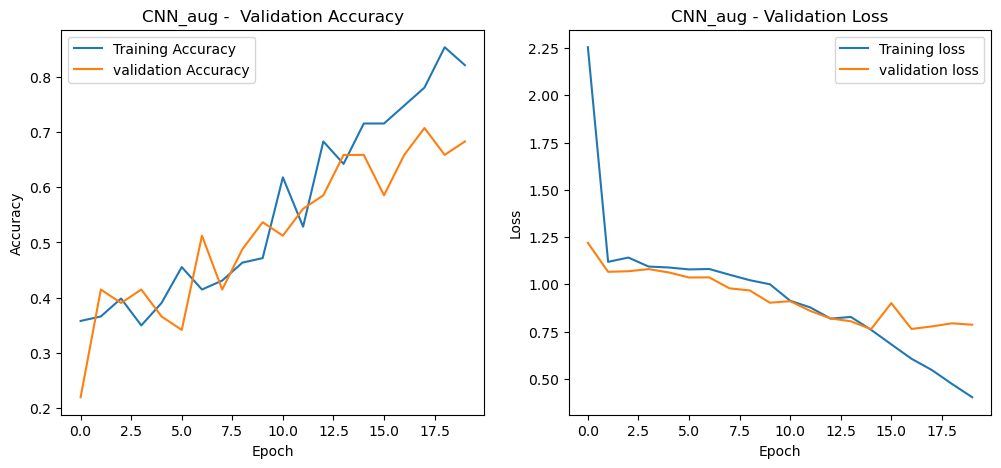

In [77]:
# Plot validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
# plt.plot(accuracy, label='Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN_aug -  Validation Accuracy')
plt.legend(['Training Accuracy','validation Accuracy'])

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN_aug - Validation Loss')
plt.legend(['Training loss','validation loss'])
plt.show()

#### Analysis : After running into particular epoch, underfitting occurs

In [78]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

2/2 [==============================] - 1s 87ms/step - loss: 0.8218 - accuracy: 0.6585
Test Accuracy: 0.6585


In [79]:
# Predict classes for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred

2/2 [==============================] - 0s 84ms/step


array([2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 1],
      dtype=int64)

In [80]:
y_test

array([1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1])

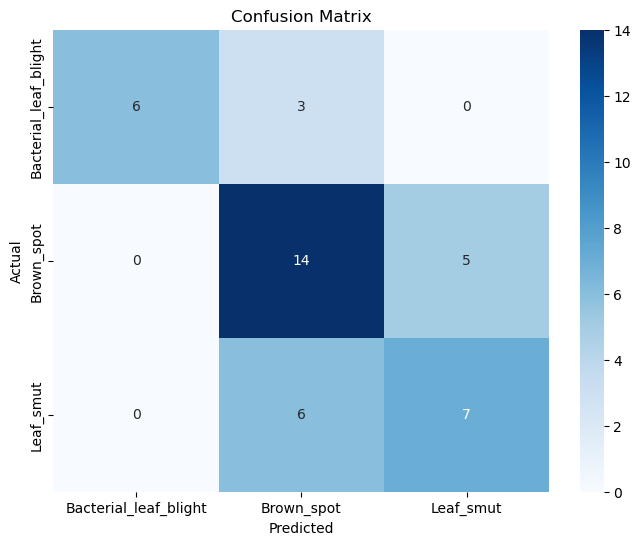

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], yticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [82]:
# Classification Report
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report
class_report = classification_report(y_test, y_pred, target_names=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
print('Classification Report:\n', class_report)

cnn_aug_accuracy = accuracy_score(y_test,y_pred)
print("CNN_aug_accuracy: %f" % cnn_aug_accuracy)

cnn_aug_precision = precision_score(y_test,y_pred,average='macro')
print("CNN__aug_precision: %f" % cnn_aug_precision)

cnn_aug_recall = recall_score(y_test,y_pred,average='macro')
print("CNN_aug_recall: %f" % cnn_aug_recall)

cnn_aug_f1_score = f1_score(y_test,y_pred,average='macro')
print("CNN_aug_f1_score: %f" % cnn_aug_f1_score)

Classification Report:
                        precision    recall  f1-score   support

Bacterial_leaf_blight       1.00      0.67      0.80         9
           Brown_spot       0.61      0.74      0.67        19
            Leaf_smut       0.58      0.54      0.56        13

             accuracy                           0.66        41
            macro avg       0.73      0.65      0.68        41
         weighted avg       0.69      0.66      0.66        41

CNN_aug_accuracy: 0.658537
CNN__aug_precision: 0.730676
CNN_aug_recall: 0.647323
CNN_aug_f1_score: 0.675556


#### Analysis: with the above CNN model with data augmentation, eventhough with less no. of images the model performs 66% accuracy to predict the images with 3 different classes

## Hyper parameter tuning

In [83]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image

In [84]:
# Set image size and other parameters
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 3

In [85]:
# Directory where the images are stored
data_dir = 'Dataset_aug/'

In [86]:
# Preprocess function: convert to grayscale, resize, normalize
def preprocess_image(image):
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((IMG_SIZE, IMG_SIZE))  # Resize to 224x224
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]
    return image_array

# Load images and labels
def load_images_from_folder(data_dir):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(data_dir)):
        class_folder = os.path.join(data_dir, class_name)
        if os.path.isdir(class_folder):
            for file_name in os.listdir(class_folder):
                file_path = os.path.join(class_folder, file_name)
                image = Image.open(file_path)
                image_array = preprocess_image(image)
                images.append(image_array)
                labels.append(class_label)
    return np.array(images), np.array(labels)

# Load dataset
images, labels = load_images_from_folder(data_dir)

# Reshape images to include the channel dimension (since it's grayscale)
images = images.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [87]:
images

array([[[[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        ...,

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[1.        ],
         [1.        ],
         [1.        ],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]]],


       [[[0.94901961],
         [0.94509804],
         [0.94

In [88]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [89]:
print(X_train.shape,X_temp.shape)
print(y_train.shape,y_temp.shape)
print(X_val.shape,X_test.shape)
print(y_val.shape,y_test.shape)

(123, 224, 224, 1) (82, 224, 224, 1)
(123,) (82,)
(41, 224, 224, 1) (41, 224, 224, 1)
(41,) (41,)


In [90]:
import keras_tuner as kt
from tensorflow.keras import layers, models

In [91]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)))

    # Tune number of filters in the convolutional layers
    for i in range(hp.Int('num_conv_layers', 1, 3)):  # 1 to 3 layers
        model.add(layers.Conv2D(hp.Int('filters_' + str(i), 32, 128, step=32), (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [92]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='cnn_tuning'
)


In [93]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_early = EarlyStopping(monitor='val_accuracy', patience=5)

In [94]:
# Save the best model weights
checkpoint = ModelCheckpoint(
    filepath='best_model_cnn',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # 'max' because we want the best accuracy
    verbose=1
)

In [95]:
# Start the hyperparameter search
history = tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early, checkpoint])

Trial 30 Complete [00h 04m 28s]
val_accuracy: 0.5853658318519592

Best val_accuracy So Far: 0.5853658318519592
Total elapsed time: 00h 46m 04s


In [96]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters: ", best_hyperparameters.values)

Best Hyperparameters:  {'num_conv_layers': 2, 'filters_0': 96, 'dense_units': 64, 'dropout': 0.30000000000000004, 'filters_1': 128, 'filters_2': 128, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}


#### Analysis: From hyper parameter tuning, we can find out at which layers and neurons the model performs better results, due to computational resource optimization technique are not used. From keras.tuner best neurons are find out. The layers are mentioned in above code. 

In [97]:
# Now further train the best model to get a history object for plotting
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 0.9065 - accuracy: 0.7073 - val_loss: 0.9032 - val_accuracy: 0.3902
Epoch 2/20
4/4 [==============================] - 11s 3s/step - loss: 0.8062 - accuracy: 0.6179 - val_loss: 0.8690 - val_accuracy: 0.6098
Epoch 3/20
4/4 [==============================] - 11s 3s/step - loss: 0.7827 - accuracy: 0.6341 - val_loss: 0.8013 - val_accuracy: 0.6098
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 0.6475 - accuracy: 0.7886 - val_loss: 0.7372 - val_accuracy: 0.6585
Epoch 5/20
4/4 [==============================] - 12s 3s/step - loss: 0.5144 - accuracy: 0.7886 - val_loss: 0.8332 - val_accuracy: 0.6341
Epoch 6/20
4/4 [==============================] - 12s 3s/step - loss: 0.4375 - accuracy: 0.8455 - val_loss: 0.7949 - val_accuracy: 0.6341
Epoch 7/20
4/4 [==============================] - 11s 3s/step - loss: 0.3550 - accuracy: 0.8780 - val_loss: 0.8242 - val_accuracy: 0.6829
Epoch 8/20
4/4 [==================

In [98]:
best_model.save("best_model_cnn.keras")

In [99]:
# load the model
from tensorflow.keras.models import load_model
best_model = load_model('best_model_cnn.keras')

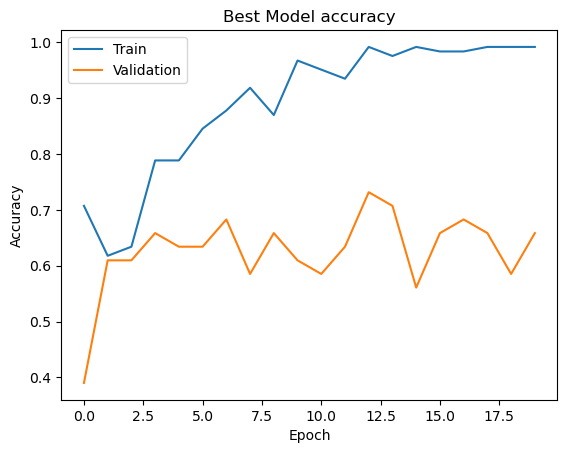

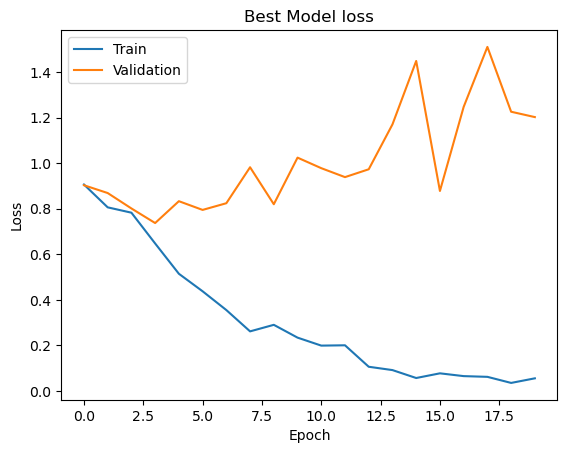

In [101]:
# Plotting Accuracy and Loss
# history_dict = best_model.history.history
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Best Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Best Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [102]:
# Evaluate the model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

2/2 [==============================] - 1s 233ms/step - loss: 1.2243 - accuracy: 0.5854
Test Accuracy: 0.5854


In [103]:
# Predict classes for the test set
y_pred = np.argmax(best_model.predict(X_test), axis=1)
y_pred

2/2 [==============================] - 1s 221ms/step


array([2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1,
       1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0],
      dtype=int64)

In [104]:
y_test

array([1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2, 1])

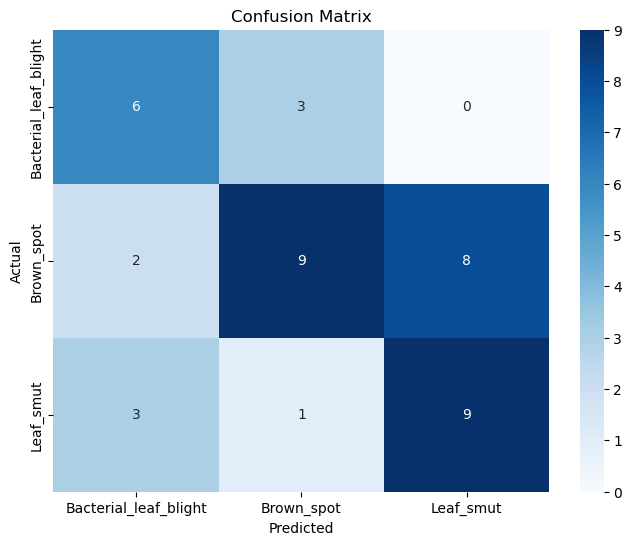

In [105]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], yticklabels=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# Classification Report
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, confusion_matrix, classification_report
class_report = classification_report(y_test, y_pred, target_names=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'])
print('Classification Report:\n', class_report)

cnn_ft_accuracy = accuracy_score(y_test,y_pred)
print("CNN_ft_accuracy: %f" % cnn_ft_accuracy)

cnn_ft_precision = precision_score(y_test,y_pred,average='macro')
print("CNN_ft_precision: %f" % cnn_ft_precision)

cnn_ft_recall = recall_score(y_test,y_pred,average='macro')
print("CNN_ft_recall: %f" % cnn_ft_recall)

cnn_ft_f1_score = f1_score(y_test,y_pred,average='macro')
print("CNN_ft_f1_score: %f" % cnn_ft_f1_score)

Classification Report:
                        precision    recall  f1-score   support

Bacterial_leaf_blight       0.55      0.67      0.60         9
           Brown_spot       0.69      0.47      0.56        19
            Leaf_smut       0.53      0.69      0.60        13

             accuracy                           0.59        41
            macro avg       0.59      0.61      0.59        41
         weighted avg       0.61      0.59      0.58        41

CNN_ft_accuracy: 0.585366
CNN_ft_precision: 0.589058
CNN_ft_recall: 0.610886
CNN_ft_f1_score: 0.587500


#### Analysis: From the above reports, model predict all the 3 different classes with 58% of accuracy where are ANN model does not predict all the classes.

## Performance and comparison metrics

In [107]:
import pandas as pd

In [115]:
result = {"ANN":(ann_accuracy,ann_precision,ann_recall,ann_f1_score), 
          "CNN":(cnn_accuracy,cnn_precision,cnn_recall,cnn_f1_score),
          "ANN_AUG":(ann_aug_accuracy,ann_aug_precision,ann_aug_recall,ann_aug_f1_score),
          "CNN_FT":(cnn_ft_accuracy,cnn_ft_precision,cnn_ft_recall,cnn_ft_f1_score),
          "CNN_AUG":(cnn_aug_accuracy,cnn_aug_precision,cnn_aug_recall,cnn_aug_f1_score)
               }

result = pd.DataFrame(result,index=['accuracy','precision','recall','f1_score'])

In [116]:
result = result.round(decimals=4)
result

,ANN,CNN,ANN_AUG,CNN_FT,CNN_AUG
accuracy,0.3750,0.4167,0.4634,0.5854,0.6585
precision,0.1250,0.2370,0.1545,0.5891,0.7307
recall,0.3333,0.3667,0.3333,0.6109,0.6473
f1_score,0.1818,0.2876,0.2111,0.5875,0.6756


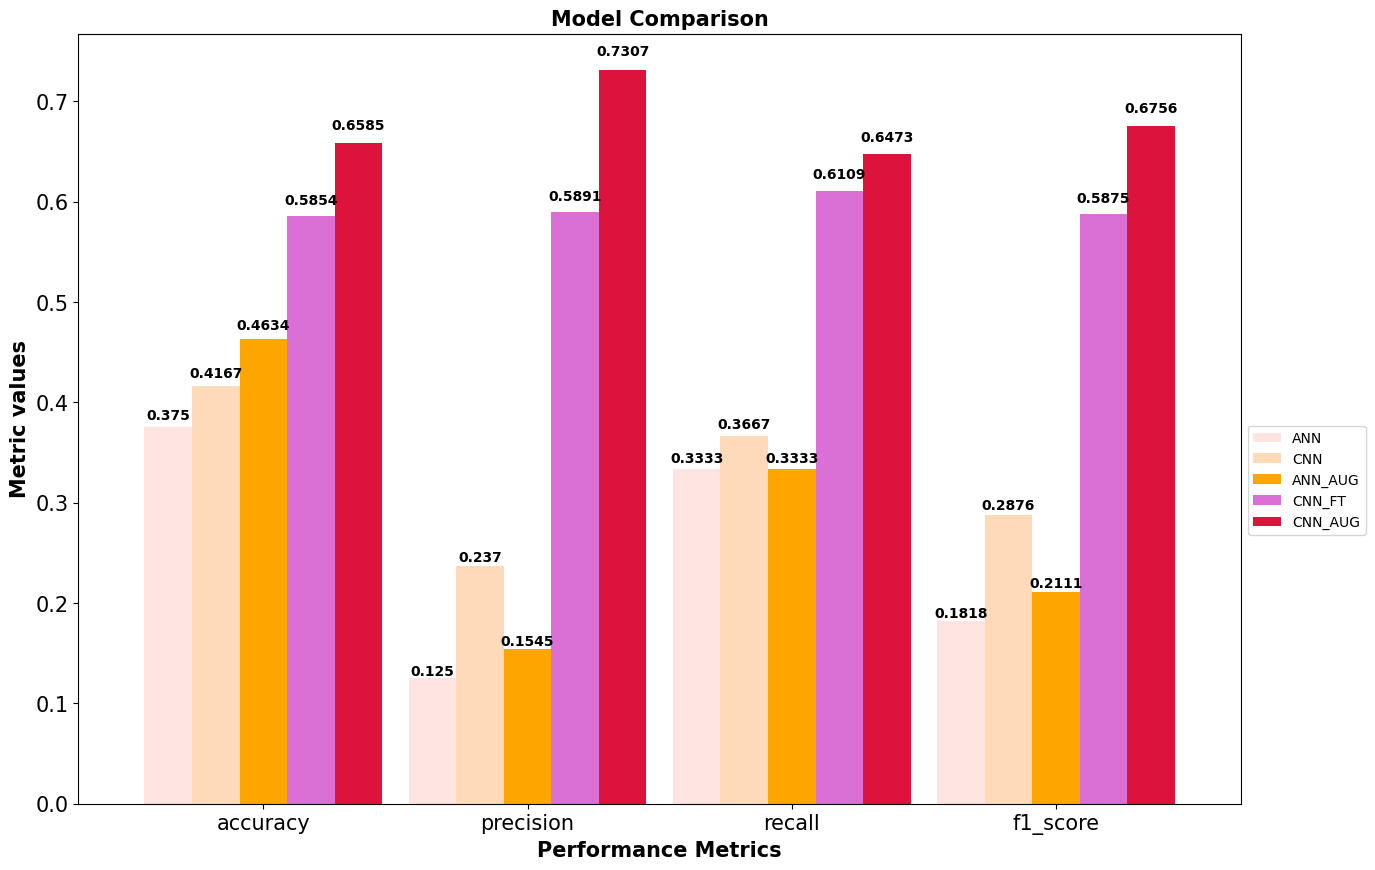

In [117]:
import matplotlib.pyplot as plt
colors_list=['mistyrose','peachpuff','orange','orchid','crimson']
ax = result.plot(kind='bar', figsize=(15,10), width=0.9, color=colors_list, edgecolor=None, fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontweight='bold')

plt.title("Model Comparison",size=15,fontweight="bold")
plt.xlabel("Performance Metrics",size=15,fontweight="bold")
plt.ylabel("Metric values",size=15,fontweight="bold")

plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor =(1, 0.5))
plt.show()

In [118]:
result.to_csv("final_results.csv")

In [119]:
result

,ANN,CNN,ANN_AUG,CNN_FT,CNN_AUG
accuracy,0.3750,0.4167,0.4634,0.5854,0.6585
precision,0.1250,0.2370,0.1545,0.5891,0.7307
recall,0.3333,0.3667,0.3333,0.6109,0.6473
f1_score,0.1818,0.2876,0.2111,0.5875,0.6756


#### Analysis: All the models are built, their metrics are calculated which is plotted in bar graphs, where the results are stored into .csv format.

## Challenges Faced:

## 1. preprocessing the given data into required format takes into various region to know about different technique
## 2. Building CNN and ANN architeture was quite tough
## 3. Finding out better optimizer, loss funcion and learning rate takes time to fit the model
## 4. To know the reason of why ANN model performs biased
## 5. Finding out the best neurons in each and every layer using hyperparameter tuning consumes lof of time

# Evaluation:
## ---> In our model, Convolutional neural network with different layers, max pooling layers, followed by dense layers and classification task are done.
## ---> When it comes to image classification, neural network generally performs well with minimum number of images, moreover augmentation techniques also involved to make the training of samples with Convolutional neural network with 2 to 3 layers, followed by dense layers improves the performance of model. 
## ---> Best model should be CNN to get the better prediction.